<a href="https://colab.research.google.com/github/MaryamNourii/EmotionDetection/blob/Prepare-Data-and-Clean/EmotionDetection_DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!pip install libwapiti parsivar
!pip install hazm
!pip3 install wordcloud-fa
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached nltk-3.4.5-py3-none-any.whl
  Attempting uninstall: nltk
    Found existing installation: nltk 3.3
    Uninstalling nltk-3.3:
      Successfully uninstalled nltk-3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
hazm 0.7.0 requires nltk==3.3, but you have nltk 3.4.5 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached nltk-3.3-py3-none-any.whl
  Attempting uninstall: nltk
    Found existing installation: nltk 3.4.5
    Uninstalling nltk-3.4.5:
      Successfully uninstalled nltk-3.4.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
parsivar 0.2.3 requires nltk==3.4.5, but you have nltk 3.3 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [133]:
import re
import pandas as pd
import numpy as np
import string

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
colors = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(colors))
matplotlib.rcParams['figure.figsize'] = 12, 8

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


import nltk
from nltk import *
from nltk.util import ngrams

from sklearn.feature_extraction.text import CountVectorizer
from wordcloud_fa import WordCloudFa

import hazm
import parsivar

In [134]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [254]:
test = pd.read_csv('armanTest.tsv', sep='\t')
train = pd.read_csv('armanTrain.tsv', sep='\t')
df1 = pd.concat([train, test])
df1 = df1.drop_duplicates()
df1

,text,label
0,خیلی کوچیک هستن و سایزشون بدرد نمیخوره میخوام ...,SAD
1,از صدای پرنده دم دمای صبح متنفرم متنفرم متنفرم,HATE
2,"""کیفیتش خیلی خوبه با شک خریدم ولی واقعا راضیم...",SAD
3,چون همش با دوربین ثبت شده ، ایا میشه اعتراض زد...,OTHER
4,اين وضع ب طرز خنده داري گريه داره ...,SAD
...,...,...
1146,یعنی این آهنگ مرغ سحر جوری ساخته شده و روی این...,HAPPY
1147,درود بر همه ایرانیان شریف که در این سرما در تظ...,HAPPY
1148,امروز تولدم است،عید است ولی شاد نیستم،عید و تو...,SAD
1149,لعنت به اونی که دلتنگ نگهت میداره...,SAD


In [255]:
df = pd.read_csv('EmoPars.csv', sep=',')
df = df.drop_duplicates()
new_df = df.drop(columns=['text'])
df['max'] = new_df.max(axis=1)
df['label'] = new_df.idxmax(axis=1)
df.loc[df['max'] < 3, 'label'] = "OTHER"
df['label'].replace({'Sadness':'SAD', 'Hatred':'HATE', 'Fear':'FEAR', 'Anger':'ANGRY', 'Happiness':'HAPPY', 'Wonder':'SURPRISE'}, inplace=True)
new_df = df[['text', 'label']].reset_index(drop=True)
new_df

,text,label
0,کررررررونا رو شکست میدهیم؟\nمرحله بعد چه گوهی ...,ANGRY
1,اگر در چند ماه اخیر تصمیم داشته اید وارد بورس ...,FEAR
2,یکی از پدرسوختگی های #برانداز اینه که ظاهرا ژس...,ANGRY
3,یکی از دوستای دبستانم,OTHER
4,@username اینقدر گرفتار مسایل میشی که تخصص از ...,SURPRISE
...,...,...
29995,@username @username اتفاقا جامعه دوپاره نیست،ا...,OTHER
29996,چرا مخالف #تحریم‌ ها بودیم و هستیم و چرا با #ب...,SAD
29997,@username اصلا اینطور نیست.\nببین توی ایران سر...,OTHER
29998,نفس نفسمان شده کنکور\nشب و روزمان شده تلاش برا...,OTHER


In [256]:
final_df = pd.concat([new_df, df1])
OTHER = final_df[final_df['label'] == 'OTHER'].sample(n = max, replace = False).reset_index(drop=True)
final_df = final_df[final_df['label'] != 'OTHER']
final_df = pd.concat([final_df, OTHER])
np.random.shuffle(final_df.values)
final_df.to_csv('FinalData.csv', index=False)
final_df

,text,label
0,حوصلم سر رفته و دوس دارم با دوستام برم بیرون ا...,ANGRY
1,اشتیاقی ک ب دیدار تو دارد دل من دل من داند و م...,SURPRISE
2,اینها (اکثریتی توده‌ای ها و اصلاح‌طلبانی که کم...,ANGRY
4,عجیییییب,SURPRISE
5,@username کارگر ساده در چین ۱۲ میلیون حقوق میگ...,HAPPY
...,...,...
2626,زیرِ تیغِ قضاوتِ آیندگان؛ همه چیز به سکوت یا ...,SAD
2627,تناسلی چرا منو بلاک کرده؟,OTHER
2628,همهش اون حرفش توی سرمه که گفت من سعی میکنم همی...,SAD
2629,از کل زندگیم تا حداقل سه سال دیگهم متنفرم، کم ...,HATE


In [257]:
final_df.head(10)

,text,label
0,حوصلم سر رفته و دوس دارم با دوستام برم بیرون ا...,ANGRY
1,اشتیاقی ک ب دیدار تو دارد دل من دل من داند و م...,SURPRISE
2,اینها (اکثریتی توده‌ای ها و اصلاح‌طلبانی که کم...,ANGRY
4,عجیییییب,SURPRISE
5,@username کارگر ساده در چین ۱۲ میلیون حقوق میگ...,HAPPY
6,همه یادشون میمونه باهاشون چیکار کردی ولی یادشو...,OTHER
9,mindhunter ببین میفهمی این کثافتی که تو ذهنته ...,ANGRY
11,ممانعت از اعزام #احمدرضا_جلالی به بیمارستان! م...,SAD
12,تا حالا ۵۹ نفر از ویروس کرونا جون سالم به در ب...,HATE
15,حق با بودایی ها است. آدم های ناآگاه به مرگ مح...,OTHER


In [258]:
final_df['label'].value_counts(normalize=True)

ANGRY       0.187038
OTHER       0.186967
SAD         0.184480
SURPRISE    0.116615
HATE        0.115620
HAPPY       0.108513
FEAR        0.100767
Name: label, dtype: float64

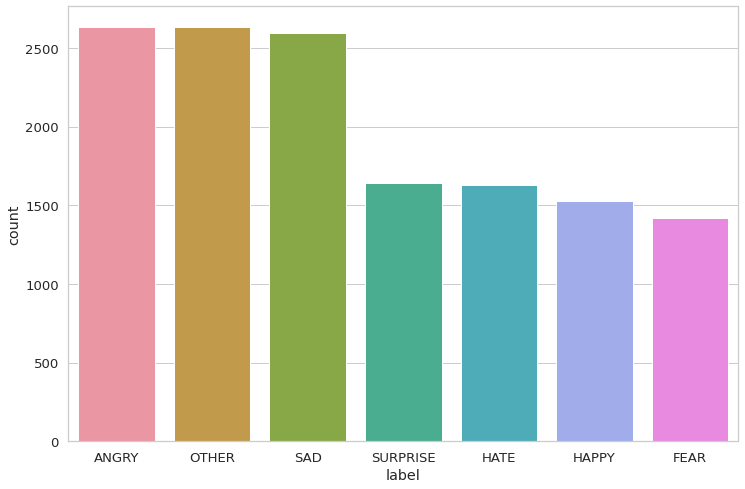

In [259]:
sns.countplot(final_df['label'],order = final_df['label'].value_counts(normalize=True).index)

In [260]:
final_df['text_length'] = final_df['text'].astype(str).apply(len)
final_df['text_word_count'] = final_df['text'].apply(lambda x: len(str(x).split()))

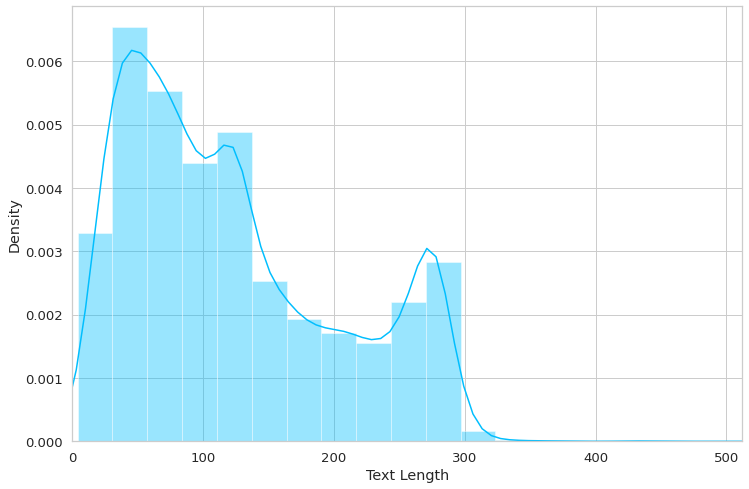

In [261]:
sns.distplot(final_df['text_length'])
plt.xlim([0, 512]);
plt.xlabel('Text Length');

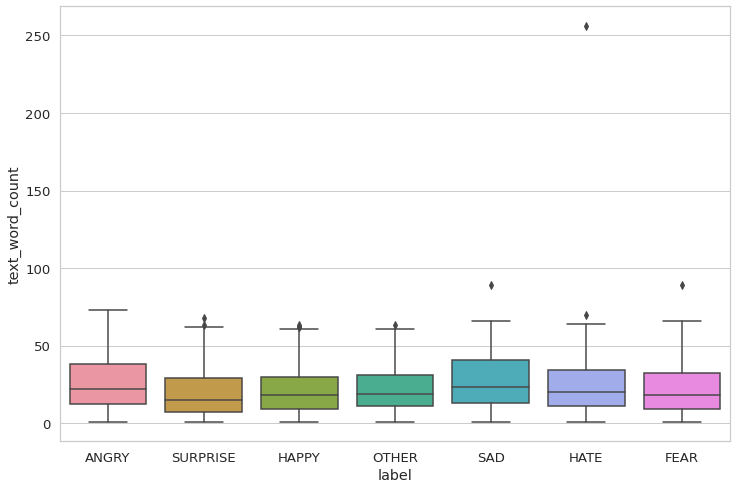

In [262]:
sns.boxplot(x="label", y="text_word_count", data=final_df)

In [263]:
def text_normalizer(text):

    # hazm_normalizer = hazm.Normalizer()
    # file = hazm_normalizer.normalize(text)
    # text = file


    # parsivar_normalizer = parsivar.Normalizer()
    # file = parsivar_normalizer.normalize(text)
    # text = file
    # tokens = bert_tokenizer.tokenize(text)
    tokens = nltk.word_tokenize(text)
    newfile=''
    for word in tokens:
        word = word.replace(" ", "").replace("\u200c", "").replace("=", "= ").upper().replace("+", "+ ").upper().replace("^", "^ ").upper().replace("/", "/ ").upper().replace("-", "- ").upper().replace(")", ") ").upper().replace(".", ". ").upper().replace("!", "! ").upper().replace("؟", "؟ ").upper().replace("\ufeff\n","").lower().replace(
            "،", "، ").upper().replace("*", "* ").upper().replace("٪", "٪ ").upper().replace('ة' , 'ه').replace('ي', 'ی').replace("؛" , '؛ ').upper().replace("!" , ' !').lower().replace("؛" , ' ؛').lower().replace("." , ' .').lower().replace("؟" , " ؟").lower().replace(
            "،", " ،").lower().replace(")", " )").lower().replace("^", " ^").lower().replace("=", " =").lower().replace("+", " +").lower().replace("*", " *").lower().replace("-", " -").upper().replace("/", " /").lower().replace("٪", " ٪").lower().replace('\xa0','').replace('ک' , 'ك').replace('\d+', '').replace('#', '').replace('_', '').replace('@', '').replace('username', '')
            # .replace('پ' , 'ب')
        newfile = newfile + ' ' + word

    return newfile

def remove_emojis( text):

    emoji_pattern = re.compile("["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
    "]+", flags=re.UNICODE)    
    return emoji_pattern.sub(r'', text)

def remove_english_words( text):
    return re.sub(r'[A-Za-z]+', '' , text)

def remove_hashtags( text):
    text = re.sub(r"#[A-Za-z0-9_]+","", text)
    text = re.sub(r"#[\u06F0-\u06F9\u0660-\u0669\u0621-\u0628\u062A-\u063A\u0641-\u0642\u0644-\u0648\u064E-\u0651\u0655\u067E\u0686\u0698\u06A9\u06AF\u06BE\u06CC_]+","", text)
    return text

def remove_numbers( text):
    for i, j in zip('۱۲۳۴۵۶۷۸۹۰', '1234567890'):
      text = text.replace(i, j)
    # print(text)
    return re.sub(r"[0-9]+","", text)

def remove_mentions( text):
    return re.sub(r"@[A-Za-z0-9_]+","", text)

def sentence_tokenize( text):
    pattern = re.compile(r'[.!؟؛?\n][ ]*')
    return pattern.split(text)

def word_tokenize( sentence):
    return re.findall(r"[\w']+", sentence)

def remove_Stopword(text):
    file = nltk.word_tokenize(text)
    # file = bert_tokenizer.tokenize(text)
    # print(file)
    newFile=''
    stopWord=[]
    fin=open('stopword.txt',encoding='utf8')

    for word in fin.readlines():
        stopWord.append(word.replace('\n', '').lower().replace('\ufeff', '').lower().replace('\ufeff', '').upper().replace(" " ,""))

    for word in file:
        word=word.replace(' ', '')
        if word in stopWord:
            continue
        else:
            newFile = newFile + ' ' + word


    return newFile

def remove_url( text):
    text =  re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)
    return text

def remove_character_duplications(text):
    words = nltk.word_tokenize(text)
    # words = bert_tokenizer.tokenize(text)
    # print(words)    
    new_words = ''
    for word in words:
      word = re.sub(r'(.)\1\1+', r'\1', word)
      new_words = new_words + ' ' + word
    return new_words



def get_top_n_gram(corpus,ngram_range,n=None):
    vec= None
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [296]:
final_df['text_normalized'] = final_df['text'].apply(lambda t: text_normalizer(t))
final_df['text_normalized']

0        حوصلم سر رفته و دوس دارم با دوستام برم بیرون ...
1        اشتیاقی ك ب دیدار تو دارد دل من دل من داند و ...
2        اینها ( اكثریتی تودهای ها و اصلاحطلبانی كه كم...
4                                                عجیییییب
5          كارگر ساده در چین ۱۲ میلیون حقوق میگیرد . ی...
                              ...                        
2626     زیرِ تیغِ قضاوتِ آیندگان ؛  همه چیز به سكوت ی...
2627                          تناسلی چرا منو بلاك كرده ؟ 
2628     همهش اون حرفش توی سرمه كه گفت من سعی میكنم هم...
2629     از كل زندگیم تا حداقل سه سال دیگهم متنفرم ،  ...
2630     این چه مدل مبارزه و اعتراضه ؟  خانم محترم توه...
Name: text_normalized, Length: 14072, dtype: object

In [297]:
final_df['rmv_stp_wrd'] =final_df['text_normalized'].apply(lambda t:remove_Stopword(t))
final_df['rmv_stp_wrd']

0        حوصلم دوس دوستام برم میدونم میگن باز اعصابم م...
1                   اشتیاقی دیدار دل دل داند دانم دل داند
2        اكثریتی تودهای اصلاحطلبانی حكومت اسلامی رسانه...
4                                                عجیییییب
5        كارگر ساده چین ۱۲ میلیون حقوق میگیرد مهندس ای...
                              ...                        
2626     تیغِ قضاوتِ آیندگان سكوت فریاد بسته اینكه سنگ...
2627                                      تناسلی منو بلاك
2628     همهش حرفش توی سرمه سعی میكنم بخندم شاد شبهایی...
2629     زندگیم حداقل سه سال دیگهم متنفرم كم زیاد اصل ...
2630     مدل مبارزه اعتراضه خانم محترم توهین كسی صرفا ...
Name: rmv_stp_wrd, Length: 14072, dtype: object

In [298]:
final_df['rmv_emj_wrd'] =final_df['rmv_stp_wrd'].apply(lambda t:remove_emojis(t))
final_df['rmv_emj_wrd']

0        حوصلم دوس دوستام برم میدونم میگن باز اعصابم م...
1                   اشتیاقی دیدار دل دل داند دانم دل داند
2        اكثریتی تودهای اصلاحطلبانی حكومت اسلامی رسانه...
4                                                عجیییییب
5        كارگر ساده چین ۱۲ میلیون حقوق میگیرد مهندس ای...
                              ...                        
2626     تیغِ قضاوتِ آیندگان سكوت فریاد بسته اینكه سنگ...
2627                                      تناسلی منو بلاك
2628     همهش حرفش توی سرمه سعی میكنم بخندم شاد شبهایی...
2629     زندگیم حداقل سه سال دیگهم متنفرم كم زیاد اصل ...
2630     مدل مبارزه اعتراضه خانم محترم توهین كسی صرفا ...
Name: rmv_emj_wrd, Length: 14072, dtype: object

In [299]:
final_df['remove_numbers'] =final_df['rmv_emj_wrd'].apply(lambda t:remove_numbers(t))
final_df['remove_numbers']

0        حوصلم دوس دوستام برم میدونم میگن باز اعصابم م...
1                   اشتیاقی دیدار دل دل داند دانم دل داند
2        اكثریتی تودهای اصلاحطلبانی حكومت اسلامی رسانه...
4                                                عجیییییب
5        كارگر ساده چین  میلیون حقوق میگیرد مهندس ایرا...
                              ...                        
2626     تیغِ قضاوتِ آیندگان سكوت فریاد بسته اینكه سنگ...
2627                                      تناسلی منو بلاك
2628     همهش حرفش توی سرمه سعی میكنم بخندم شاد شبهایی...
2629     زندگیم حداقل سه سال دیگهم متنفرم كم زیاد اصل ...
2630     مدل مبارزه اعتراضه خانم محترم توهین كسی صرفا ...
Name: remove_numbers, Length: 14072, dtype: object

In [300]:
final_df['rmv_eng_wrd'] =final_df['remove_numbers'].apply(lambda t:remove_english_words(t))
final_df['rmv_eng_wrd']

0        حوصلم دوس دوستام برم میدونم میگن باز اعصابم م...
1                   اشتیاقی دیدار دل دل داند دانم دل داند
2        اكثریتی تودهای اصلاحطلبانی حكومت اسلامی رسانه...
4                                                عجیییییب
5        كارگر ساده چین  میلیون حقوق میگیرد مهندس ایرا...
                              ...                        
2626     تیغِ قضاوتِ آیندگان سكوت فریاد بسته اینكه سنگ...
2627                                      تناسلی منو بلاك
2628     همهش حرفش توی سرمه سعی میكنم بخندم شاد شبهایی...
2629     زندگیم حداقل سه سال دیگهم متنفرم كم زیاد اصل ...
2630     مدل مبارزه اعتراضه خانم محترم توهین كسی صرفا ...
Name: rmv_eng_wrd, Length: 14072, dtype: object

In [301]:
final_df['rmv_hshtag'] =final_df['rmv_eng_wrd'].apply(lambda t:remove_hashtags(t))
final_df['rmv_hshtag']

0        حوصلم دوس دوستام برم میدونم میگن باز اعصابم م...
1                   اشتیاقی دیدار دل دل داند دانم دل داند
2        اكثریتی تودهای اصلاحطلبانی حكومت اسلامی رسانه...
4                                                عجیییییب
5        كارگر ساده چین  میلیون حقوق میگیرد مهندس ایرا...
                              ...                        
2626     تیغِ قضاوتِ آیندگان سكوت فریاد بسته اینكه سنگ...
2627                                      تناسلی منو بلاك
2628     همهش حرفش توی سرمه سعی میكنم بخندم شاد شبهایی...
2629     زندگیم حداقل سه سال دیگهم متنفرم كم زیاد اصل ...
2630     مدل مبارزه اعتراضه خانم محترم توهین كسی صرفا ...
Name: rmv_hshtag, Length: 14072, dtype: object

In [302]:
final_df['rmv_mnt'] =final_df['rmv_hshtag'].apply(lambda t:remove_mentions(t))
final_df['rmv_mnt']

0        حوصلم دوس دوستام برم میدونم میگن باز اعصابم م...
1                   اشتیاقی دیدار دل دل داند دانم دل داند
2        اكثریتی تودهای اصلاحطلبانی حكومت اسلامی رسانه...
4                                                عجیییییب
5        كارگر ساده چین  میلیون حقوق میگیرد مهندس ایرا...
                              ...                        
2626     تیغِ قضاوتِ آیندگان سكوت فریاد بسته اینكه سنگ...
2627                                      تناسلی منو بلاك
2628     همهش حرفش توی سرمه سعی میكنم بخندم شاد شبهایی...
2629     زندگیم حداقل سه سال دیگهم متنفرم كم زیاد اصل ...
2630     مدل مبارزه اعتراضه خانم محترم توهین كسی صرفا ...
Name: rmv_mnt, Length: 14072, dtype: object

In [303]:
final_df['rmv_url'] =final_df['rmv_mnt'].apply(lambda t:remove_url(t))
final_df['rmv_url']

0        حوصلم دوس دوستام برم میدونم میگن باز اعصابم م...
1                   اشتیاقی دیدار دل دل داند دانم دل داند
2        اكثریتی تودهای اصلاحطلبانی حكومت اسلامی رسانه...
4                                                عجیییییب
5        كارگر ساده چین  میلیون حقوق میگیرد مهندس ایرا...
                              ...                        
2626     تیغِ قضاوتِ آیندگان سكوت فریاد بسته اینكه سنگ...
2627                                      تناسلی منو بلاك
2628     همهش حرفش توی سرمه سعی میكنم بخندم شاد شبهایی...
2629     زندگیم حداقل سه سال دیگهم متنفرم كم زیاد اصل ...
2630     مدل مبارزه اعتراضه خانم محترم توهین كسی صرفا ...
Name: rmv_url, Length: 14072, dtype: object

In [304]:
final_df['rmv_chr_dplct'] =final_df['rmv_url'].apply(lambda t:remove_character_duplications(t))
final_df['rmv_chr_dplct']

0        حوصلم دوس دوستام برم میدونم میگن باز اعصابم م...
1                   اشتیاقی دیدار دل دل داند دانم دل داند
2        اكثریتی تودهای اصلاحطلبانی حكومت اسلامی رسانه...
4                                                    عجیب
5        كارگر ساده چین میلیون حقوق میگیرد مهندس ایران...
                              ...                        
2626     تیغِ قضاوتِ آیندگان سكوت فریاد بسته اینكه سنگ...
2627                                      تناسلی منو بلاك
2628     همهش حرفش توی سرمه سعی میكنم بخندم شاد شبهایی...
2629     زندگیم حداقل سه سال دیگهم متنفرم كم زیاد اصل ...
2630     مدل مبارزه اعتراضه خانم محترم توهین كسی صرفا ...
Name: rmv_chr_dplct, Length: 14072, dtype: object

In [305]:
final_df['cleaned_data'] = final_df['rmv_chr_dplct']
clean_df = final_df[['cleaned_data', 'label']].reset_index(drop=True)
clean_df.rename(columns = {'cleaned_data':'text'}, inplace = True)
clean_df.to_csv('CleanData.csv', index=False)
clean_df

,text,label
0,حوصلم دوس دوستام برم میدونم میگن باز اعصابم م...,ANGRY
1,اشتیاقی دیدار دل دل داند دانم دل داند,SURPRISE
2,اكثریتی تودهای اصلاحطلبانی حكومت اسلامی رسانه...,ANGRY
3,عجیب,SURPRISE
4,كارگر ساده چین میلیون حقوق میگیرد مهندس ایران...,HAPPY
...,...,...
14067,تیغِ قضاوتِ آیندگان سكوت فریاد بسته اینكه سنگ...,SAD
14068,تناسلی منو بلاك,OTHER
14069,همهش حرفش توی سرمه سعی میكنم بخندم شاد شبهایی...,SAD
14070,زندگیم حداقل سه سال دیگهم متنفرم كم زیاد اصل ...,HATE


In [306]:
col = 'cleaned_data'
sadness = final_df[final_df['label']=='SAD'][col]
happy = final_df[final_df['label']=='HAPPY'][col]
angry = final_df[final_df['label']=='ANGRY'][col]
surprise = final_df[final_df['label']=='SURPRISE'][col]
fear = final_df[final_df['label']=='FEAR'][col]
hate = final_df[final_df['label']=='HATE'][col]
other = final_df[final_df['label']=='OTHER'][col]

In [307]:
sad_unigrams = get_top_n_gram(sadness.values,(1,1),7)[2:]
happy_unigrams= get_top_n_gram(happy.values,(1,1),7)[2:]
angry_unigrams= get_top_n_gram(angry.values,(1,1),7)[2:]
surprise_unigrams= get_top_n_gram(surprise.values,(1,1),7)[2:]
fear_unigrams= get_top_n_gram(fear.values,(1,1),7)[2:]
hate_unigrams= get_top_n_gram(hate.values,(1,1),7)[2:]
other_unigrams= get_top_n_gram(other.values,(1,1),7)[2:]



sad_bigrams = get_top_n_gram(sadness.values,(2,2),7)[2:]
happy_bigrams= get_top_n_gram(happy.values,(2,2),7)[2:]
angry_bigrams= get_top_n_gram(angry.values,(2,2),7)[2:]
surprise_bigrams= get_top_n_gram(surprise.values,(2,2),7)[2:]
fear_bigrams= get_top_n_gram(fear.values,(2,2),7)[2:]
hate_bigrams= get_top_n_gram(hate.values,(1,1),7)[2:]
other_bigrams= get_top_n_gram(other.values,(2,2),7)[2:]


sad_trigrams = get_top_n_gram(sadness.values,(3,3),7)[2:]
happy_trigrams= get_top_n_gram(happy.values,(3,3),7)[2:]
angry_trigrams= get_top_n_gram(angry.values,(3,3),7)[2:]
surprise_trigrams= get_top_n_gram(surprise.values,(3,3),7)[2:]
fear_trigrams= get_top_n_gram(fear.values,(3,3),7)[2:]
hate_trigrams= get_top_n_gram(hate.values,(1,1),7)[2:]
other_trigrams= get_top_n_gram(other.values,(3,3),7)[2:]

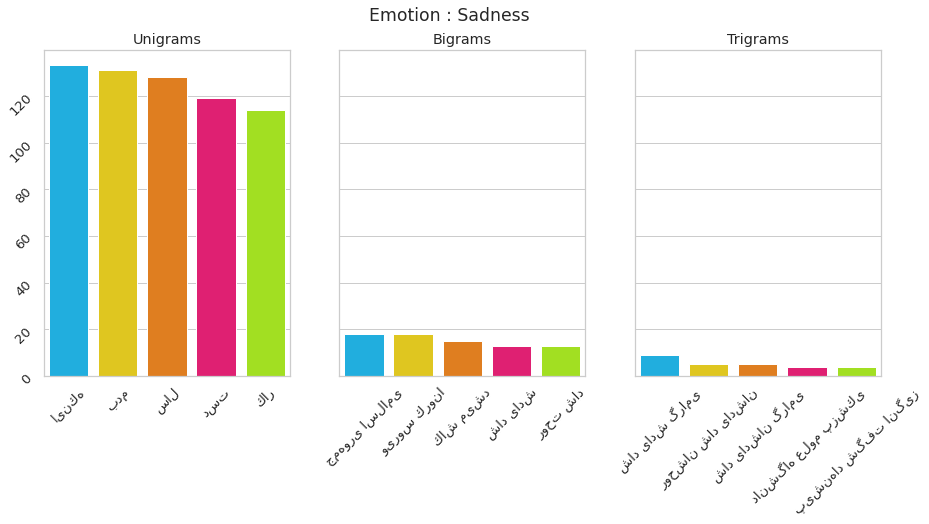

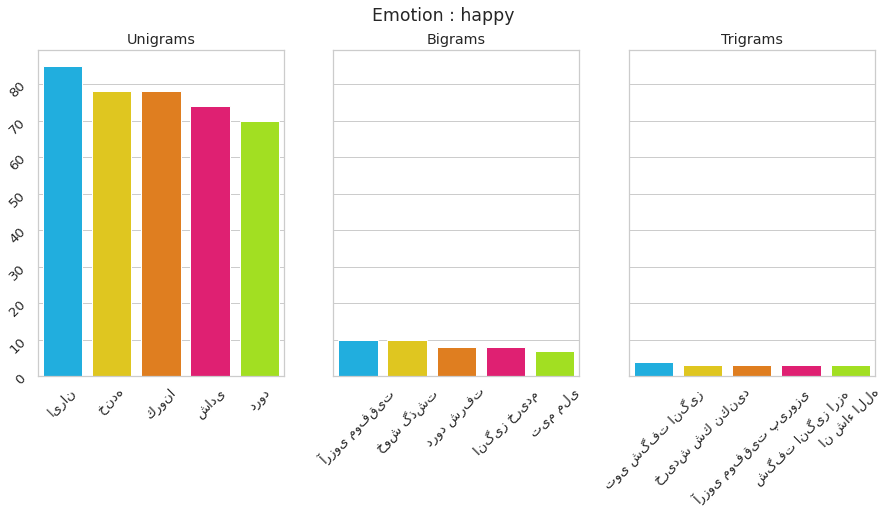

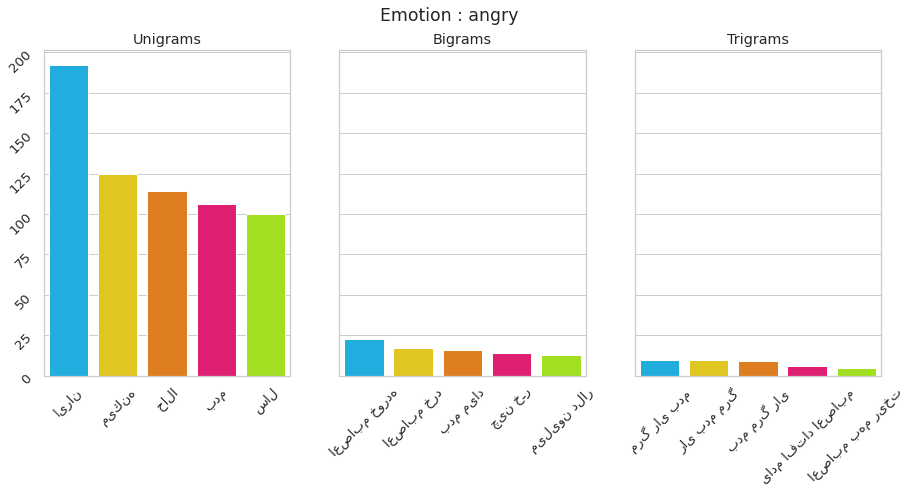

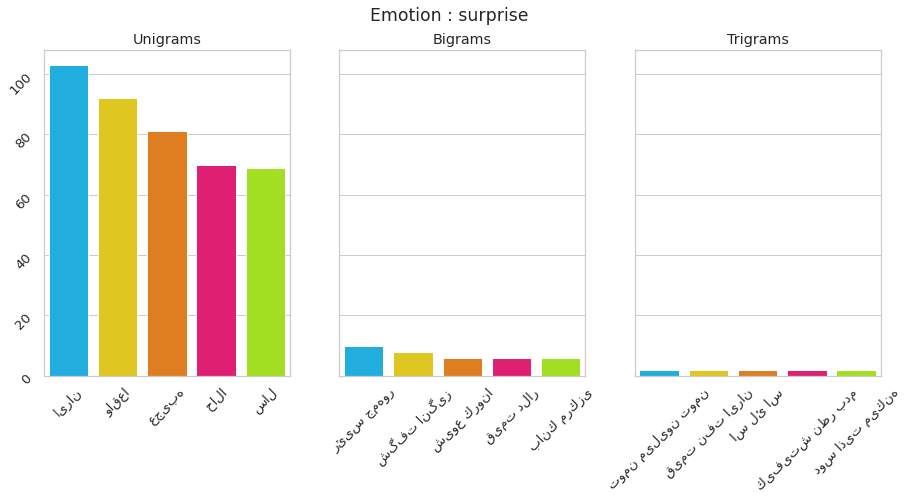

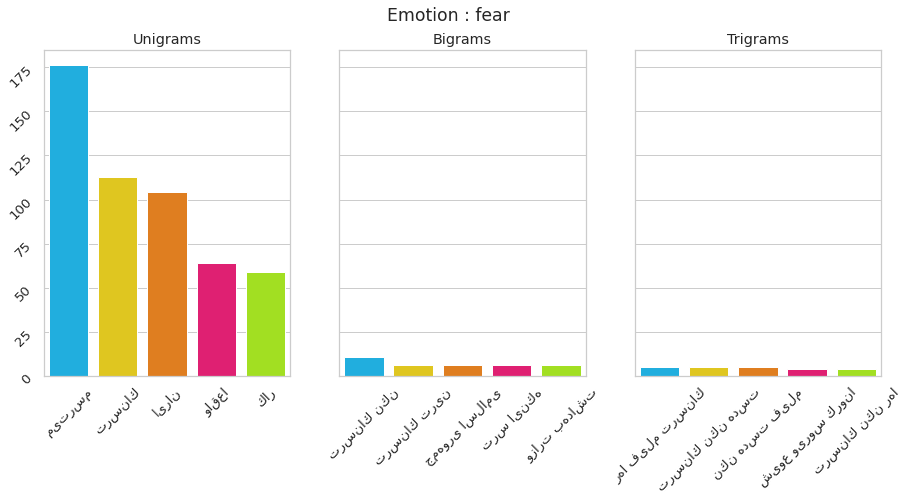

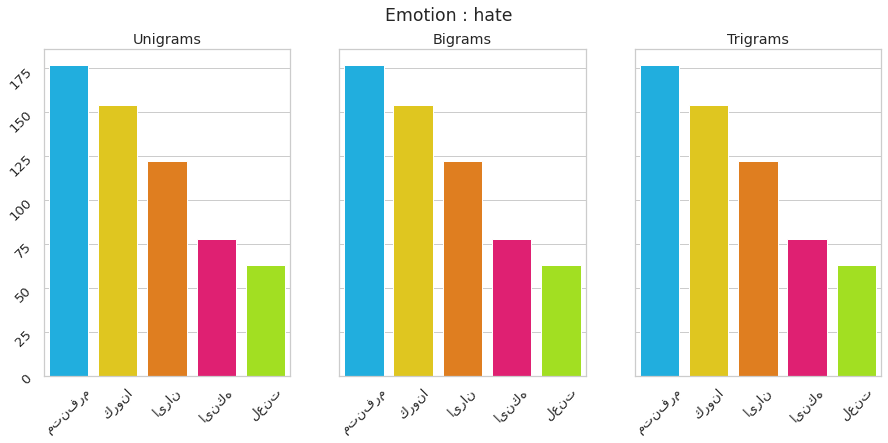

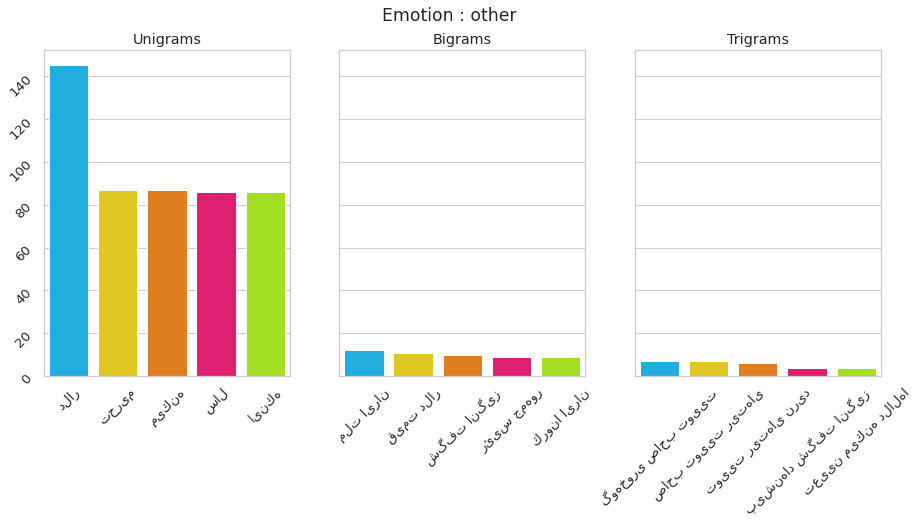

In [308]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Emotion : Sadness')



sns.barplot( list(dict(sad_unigrams).keys()), list(dict(sad_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)



sns.barplot( list(dict(sad_bigrams).keys()), list(dict(sad_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot( list(dict(sad_trigrams).keys()), list(dict(sad_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)
fig.savefig('sadness.png')


#happy

fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Emotion : happy')

sns.barplot( list(dict(happy_unigrams).keys()), list(dict(happy_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(happy_bigrams).keys()), list(dict(happy_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)


sns.barplot( list(dict(happy_trigrams).keys()), list(dict(happy_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)
fig.savefig('happy.png')

#angry

fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Emotion : angry')

sns.barplot( list(dict(angry_unigrams).keys()), list(dict(angry_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(angry_bigrams).keys()), list(dict(angry_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot( list(dict(angry_trigrams).keys()), list(dict(angry_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)


#surprise
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Emotion : surprise')

sns.barplot( list(dict(surprise_unigrams).keys()), list(dict(surprise_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(surprise_bigrams).keys()), list(dict(surprise_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot( list(dict(surprise_trigrams).keys()), list(dict(surprise_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)


#fear
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Emotion : fear')

sns.barplot( list(dict(fear_unigrams).keys()), list(dict(fear_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(fear_bigrams).keys()), list(dict(fear_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot( list(dict(fear_trigrams).keys()), list(dict(fear_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)

#hate

fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Emotion : hate')

sns.barplot( list(dict(hate_unigrams).keys()), list(dict(hate_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(hate_bigrams).keys()), list(dict(hate_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot( list(dict(hate_trigrams).keys()), list(dict(hate_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)


#other
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Emotion : other')

sns.barplot( list(dict(other_unigrams).keys()), list(dict(other_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(other_bigrams).keys()), list(dict(other_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot( list(dict(other_trigrams).keys()), list(dict(other_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)

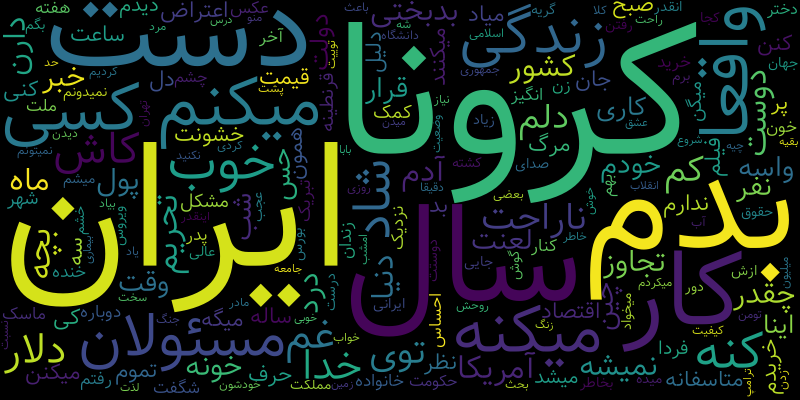

In [309]:
wodcloud = WordCloudFa(persian_normalize=True, include_numbers=False, collocations=False, width=800, height=400)
text = ' '.join([sntc for sntc in sadness])
wc = wodcloud.generate(text)
wc.to_image()

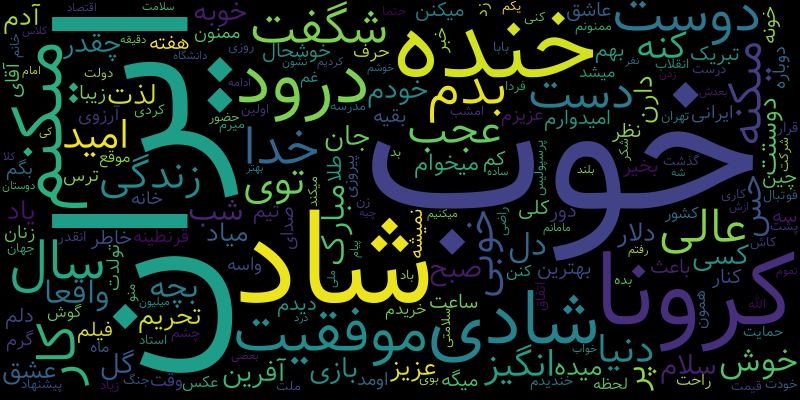

In [310]:
text = ''
text = ' '.join([sntc for sntc in happy])
wc = wodcloud.generate(text)
wc.to_image()

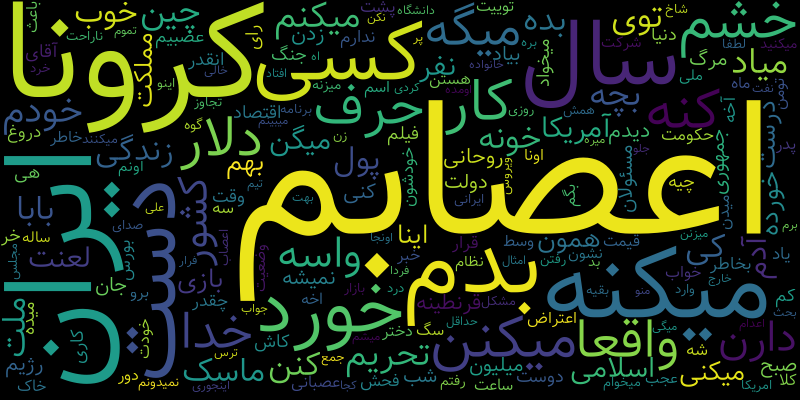

In [311]:
text = ''
text = ' '.join([sntc for sntc in angry])
wc = wodcloud.generate(text)
wc.to_image()

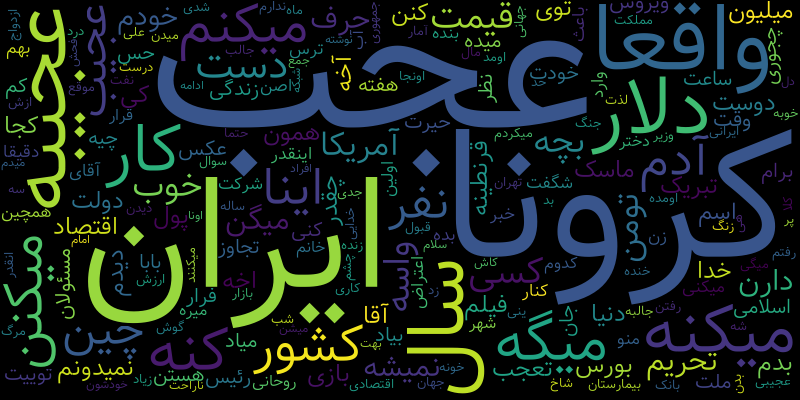

In [312]:
text = ''
text = ' '.join([sntc for sntc in surprise])
wc = wodcloud.generate(text)
wc.to_image()

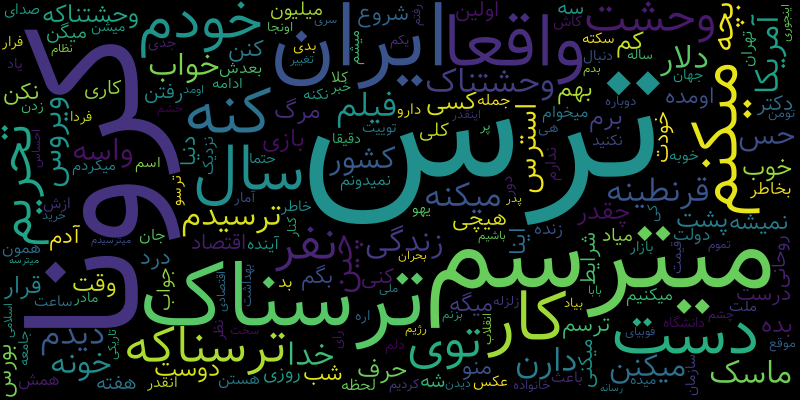

In [313]:
text = ''
text = ' '.join([sntc for sntc in fear])
wc = wodcloud.generate(text)
wc.to_image()

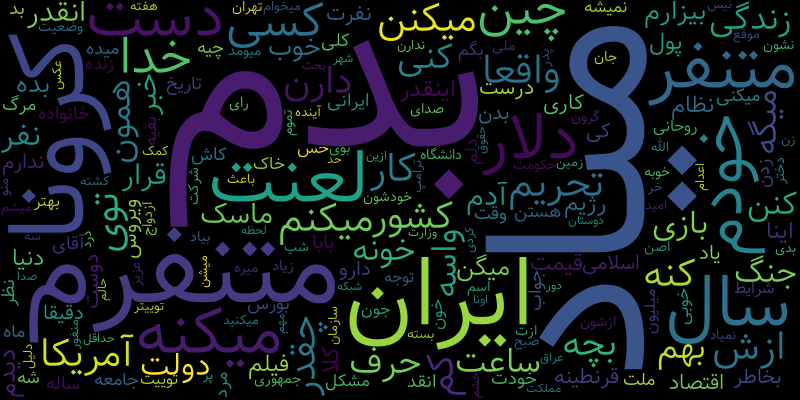

In [314]:
text = ''
text = ' '.join([sntc for sntc in hate])
wc = wodcloud.generate(text)
wc.to_image()